In [4]:
import pandas as pd
import numpy as np

# Creación del DataFrame
df = pd.read_csv("hr_raw_data_nonulls.csv")

# División en grupos según el nivel de satisfacción
df['Group'] = df["EnvironmentSatisfaction"].apply(lambda x: 'A' if x in ["Medium", "High"] else 'B')

# Calcular la tasa de rotación para cada grupo
rotation_rates = df.groupby('Group')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

# Mostrar las tasas de rotación
print(rotation_rates)


  Group  Attrition
0     A  13.395639
1     B  19.969278


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork,Group
0,51,No,Unknown,684.0,Research & Development,6,High School,"162,0",Very Low,Male,...,Medium,Zero,32.587161,5,"3,0",20,15,15,Yes,B
1,52,No,Unknown,699.0,Research & Development,1,Bachelor's,"259,0",Medium,Male,...,Very Low,Low,34.000000,5,"3,0",33,11,9,Yes,A
2,42,No,Travel Rarely,532.0,Research & Development,4,Secondary,"319,0",Medium,Male,...,High,Zero,22.000000,3,"3,0",22,11,15,Yes,A
3,47,No,Travel Rarely,359.0,Research & Development,2,Bachelor's,Unknown,Very Low,Female,...,Low,Medium,28.789780,2,"3,0",20,5,6,No,B
4,46,No,Unknown,1319.0,Research & Development,3,High School,Unknown,Very Low,Female,...,High,Low,11.520610,5,"3,0",19,2,8,No,B


In [6]:
from statsmodels.stats.proportion import proportions_ztest

# Contar el número de empleados en cada grupo y el número de rotaciones en cada grupo
counts = df['Group'].value_counts()
rotations = df[df['Attrition'] == 'Yes']['Group'].value_counts()

# Preparar los datos para la prueba z para dos proporciones
n_A = counts['A']
n_B = counts['B']
rotations_A = rotations['A'] if 'A' in rotations else 0
rotations_B = rotations['B'] if 'B' in rotations else 0

# Realizar la prueba z para dos proporciones
count = [rotations_A, rotations_B]
total_employees= [n_A, n_B]
z_stat, p_value  = proportions_ztest(count, total_employees)

z_stat, p_value


(-3.529732150066726, 0.0004159805746655478)

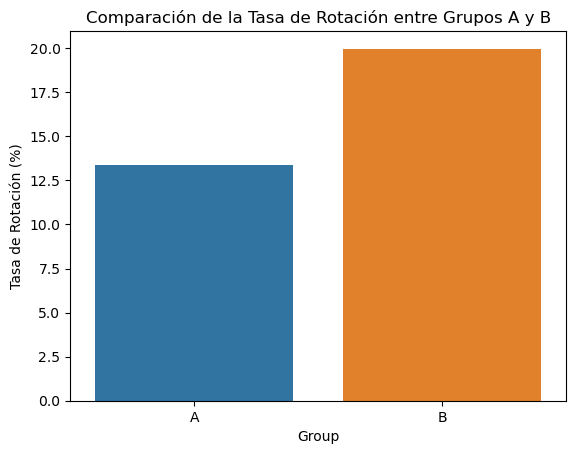

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un gráfico de barras
sns.barplot(x='Group', y='Attrition', data=rotation_rates)

# Añadir etiquetas y título
plt.xlabel('Group')
plt.ylabel('Tasa de Rotación (%)')
plt.title('Comparación de la Tasa de Rotación entre Grupos A y B')

# Mostrar el gráfico
plt.show()

Resultado de la Prueba:

z_stat = -3.529732150066726: Es el valor del estadístico z. Un valor z negativo indica que la proporción de rotación en el grupo B es mayor que en el grupo A.
p_value = 0.0004159805746655478: Es el valor p. Un valor p muy pequeño (menor que 0.05) indica que la diferencia entre las proporciones de rotación es estadísticamente significativa.

Interpretación:

Dado que el valor p es mucho menor que 0.05, se rechaza la hipótesis nula de que las tasas de rotación son iguales en ambos grupos.
Esto significa que hay una diferencia significativa en la tasa de rotación entre los grupos A y B, con el grupo B (satisfacción baja) teniendo una rotación significativamente mayor.

In [8]:
# Calcular la diferencia de medias
mean_A = rotation_rates[rotation_rates['Group'] == 'A']['Attrition'].values[0]
mean_B = rotation_rates[rotation_rates['Group'] == 'B']['Attrition'].values[0]
difference_of_means = mean_B - mean_A

# Mostrar resultados
print(f"Tasa de Rotación Grupo A: {mean_A:.2f}%")
print(f"Tasa de Rotación Grupo B: {mean_B:.2f}%")
print(f"Diferencia de Medias (B - A): {difference_of_means:.2f}%")

Tasa de Rotación Grupo A: 13.40%
Tasa de Rotación Grupo B: 19.97%
Diferencia de Medias (B - A): 6.57%


Interpretación del Resultado:

6.57% es la magnitud de la diferencia en la tasa de rotación entre los empleados de Grupo B y Grupo A.
Positivo (+6.57%): Significa que la tasa de rotación en el Grupo B (empleados menos satisfechos) es 6.57 puntos porcentuales mayor que en el Grupo A (empleados más satisfechos).

Implicaciones:

Satisfacción vs. Rotación: Este resultado sugiere que los empleados en el Grupo B (con menor satisfacción laboral) tienen una tasa de rotación más alta que los empleados en el Grupo A. Aunque la diferencia no es muy grande, muestra que la menor satisfacción está asociada con una ligera tendencia a dejar la empresa.

Una diferencia de 6.57% es relativamente pequeña pero puede ser significativa dependiendo del tamaño de la empresa y otros factores contextuales. En un contexto más amplio, incluso pequeñas diferencias pueden tener un impacto importante en la rotación y, por ende, en los costos y la cultura organizacional.
Si esta diferencia es estadísticamente significativa (lo que ya se evaluó con la prueba de hipótesis), podría ser relevante para los responsables de recursos humanos, ya que sugiere que mejorar la satisfacción laboral en los empleados con menor satisfacción podría reducir la rotación.

En resumen, un resultado de 6.57% indica que la rotación es algo mayor en los empleados menos satisfechos, lo que podría motivar a la empresa a investigar más sobre los factores que influyen en la satisfacción laboral y cómo abordarlos para mejorar la retención de empleados.